In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step-1: Understand Your Data

*   Load & Preview the dataset
*   Check data types, unique values, and presence of nulls.
*   Understand which variables are categorical and which are numerical.



In [2]:
df = pd.read_csv('/content/US_Customer_Insights_Dataset (1).csv')

df.head()

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103


In [3]:
df.columns

Index(['CustomerID', 'Name', 'State', 'Education', 'Gender', 'Age', 'Married',
       'NumPets', 'JoinDate', 'TransactionDate', 'MonthlySpend',
       'DaysSinceLastInteraction'],
      dtype='object')

In [4]:
df.shape

(10675, 12)

In [5]:
df.describe()

,Age,NumPets,MonthlySpend,DaysSinceLastInteraction
count,10675.000000,10675.000000,10675.000000,10675.000000
mean,49.474567,1.340515,331.610315,538.469883
std,18.221365,1.150849,225.799253,398.766747
min,18.000000,0.000000,3.890000,1.000000
25%,35.000000,0.000000,165.495000,218.000000
50%,49.000000,1.000000,282.110000,445.000000
75%,66.000000,2.000000,443.255000,788.500000
max,80.000000,4.000000,1740.420000,1791.000000


In [6]:
df.dtypes

,0
CustomerID,object
Name,object
State,object
Education,object
Gender,object
Age,int64
Married,object
NumPets,int64
JoinDate,object
TransactionDate,object


*   Transaction Date is object & it has to be in datetime format.
*   Join Date is object & it has to be in datetime format.





In [7]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['JoinDate'] = pd.to_datetime(df['JoinDate'])

In [8]:
df.dtypes

,0
CustomerID,object
Name,object
State,object
Education,object
Gender,object
Age,int64
Married,object
NumPets,int64
JoinDate,datetime64[ns]
TransactionDate,datetime64[ns]


In [9]:
df.nunique()

,0
CustomerID,1000
Name,990
State,10
Education,5
Gender,3
Age,63
Married,2
NumPets,5
JoinDate,731
TransactionDate,1605


In [10]:
# Check null values
df.isnull().sum()

,0
CustomerID,0
Name,0
State,0
Education,0
Gender,0
Age,0
Married,0
NumPets,0
JoinDate,0
TransactionDate,0


In [11]:
# Find the number or rows and cols.
print('Number of Rows: ',df.shape[0])
print('Number of Columns: ',df.shape[1])

Number of Rows:  10675
Number of Columns:  12


In [12]:
print(df['TransactionDate'].head())

0   2024-09-02
1   2024-06-02
2   2025-02-28
3   2025-03-29
4   2022-07-24
Name: TransactionDate, dtype: datetime64[ns]


### In Statistics, you have to find Numerical & Categorica values so we can specify each and will be good for our dataset and future ML algos.

In [13]:
categorica_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=['number'])

In [14]:
print(categorica_df.head())
print('-'*100)
print(numerical_df.head())

  CustomerID              Name       State    Education      Gender Married
0  CUST10319       Scott Perez     Florida  High School  Non-Binary     Yes
1  CUST10695   Jennifer Burton  Washington       Master        Male     Yes
2  CUST10297   Michelle Rogers     Arizona       Master      Female     Yes
3  CUST10103  Brooke Hendricks       Texas       Master        Male     Yes
4  CUST10219       Karen Johns       Texas  High School      Female     Yes
----------------------------------------------------------------------------------------------------
   Age  NumPets  MonthlySpend  DaysSinceLastInteraction
0   47        1       1281.74                       332
1   72        0        429.46                       424
2   40        2        510.34                       153
3   27        0        396.47                       124
4   28        1        139.68                      1103


Step-1 completed ....

## Step-2: Descriptive Statistics
Business Purpose: Describe your customer base — how old are they, how much do they spend, are they active?

* Compute:

  o	Mean, median, std dev for Age, MonthlySpend, DaysSinceLastInteraction
  
  o	Mode for categorical variables: Gender, Education, Married



In [15]:
numerical_df.columns

Index(['Age', 'NumPets', 'MonthlySpend', 'DaysSinceLastInteraction'], dtype='object')

In [16]:
numerical_cols = ['Age', 'MonthlySpend', 'DaysSinceLastInteraction']

# Now, We'll use agg() function to create a summary on these cols.
numerical_summary = df[numerical_cols].agg(['mean', 'median', 'std'])

print(numerical_summary)

              Age  MonthlySpend  DaysSinceLastInteraction
mean    49.474567    331.610315                538.469883
median  49.000000    282.110000                445.000000
std     18.221365    225.799253                398.766747


Here are some insights from your descriptive statistics table:

(1.) Age

→ Mean age ≈ 49.5 years, with a median of 49, suggests the age distribution is fairly centered (almost symmetric).

→ Std. dev = 18.2 years, so customers span a wide age range, roughly from early 30s to late 60s (assuming normal-like distribution).

→ This indicates a diverse customer base, with both younger and older groups represented.

(2.) Monthly Spend

→ Mean spend ≈ 332, but the median spend ≈ 282 → mean is higher than median.

→ This suggests a right-skewed distribution (a small group of high-spenders pulling the average up).

→ Std. dev ≈ 226 is quite large relative to the mean, showing high variability in spending habits.

→ Some customers likely spend very little, while others spend significantly more.

(3.) Days Since Last Interaction

→ Mean ≈ 538 days, while median ≈ 445 days.

→ The mean being higher suggests some customers have extremely long inactivity periods (right-skewed).

→ Std. dev ≈ 399 days → interaction frequency is very inconsistent across the base.

Many customers have been inactive for over a year, which may indicate churn risk.

✅ Key Insights:

* Your customer base has a balanced age distribution but spending and engagement behaviors are highly skewed.

* A minority of customers are responsible for higher spend, pulling up the average.

* Customer engagement seems low overall (high days since last interaction) → retention strategies may be needed.

In [17]:
categorica_df.columns

Index(['CustomerID', 'Name', 'State', 'Education', 'Gender', 'Married'], dtype='object')

In [18]:
categorical_cols = ['Education', 'Gender', 'Married']
categorica_summary = df[categorical_cols].agg('mode')

print(categorica_summary.T)
# .T means i've transposed the df for better view.

                0
Education  Master
Gender       Male
Married        No


Step-2: Ends Here ...

## Step-3: Data Visualization
Business Purpose: Reveal patterns that numbers alone can’t show.

*	Plot histograms and boxplots for Age, MonthlySpend
*	Create a bar chart for Gender, Education, State
*	Scatterplot: Age vs MonthlySpend
*	KDE: Spending behavior by education level or marital status


* Plot histograms and boxplots for Age, MonthlySpend

Text(0, 0.5, 'Frequency')

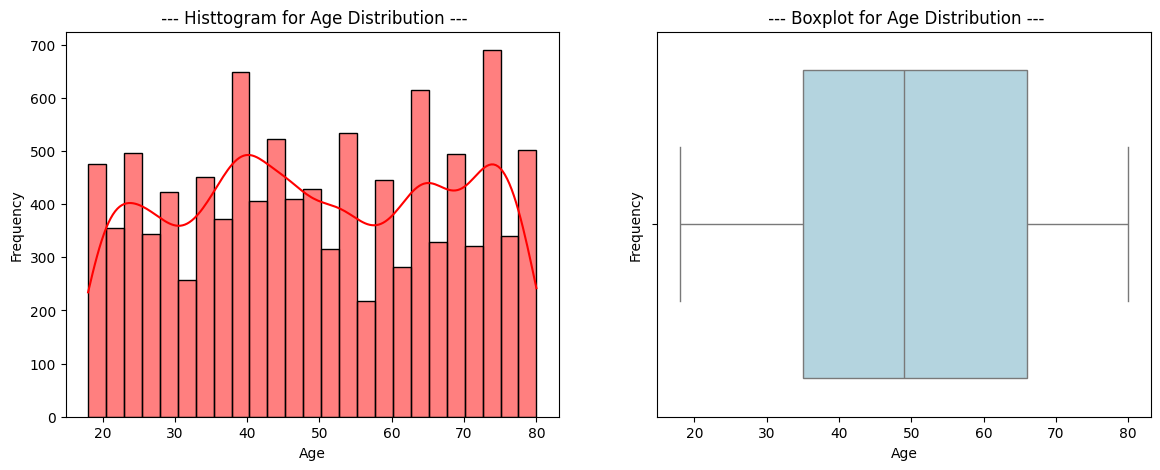

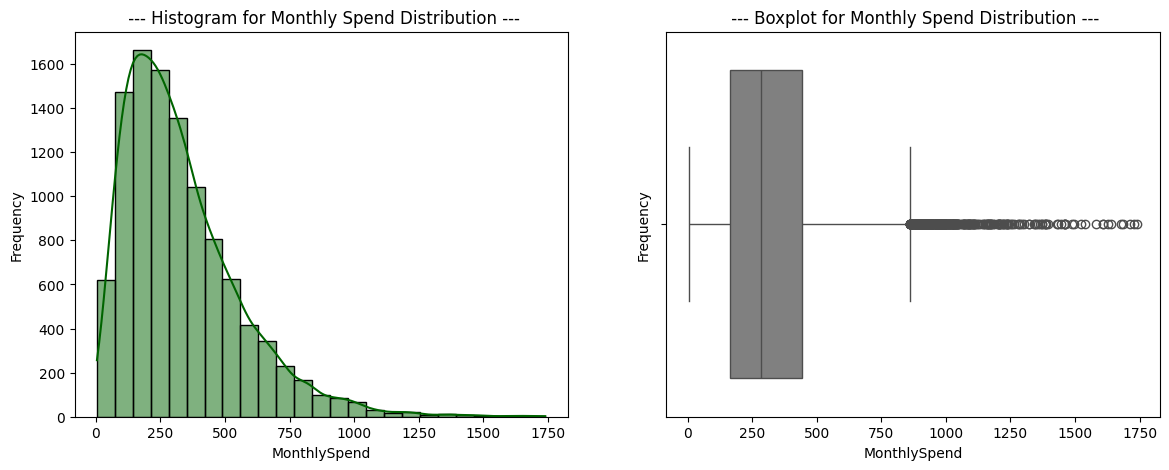

In [19]:
plt.figure(figsize=(14,5))

# We'll use subplots for better code understanding & I've already used subplots in my previous projects.
#                                              For Age:
# ---------Plot histogram for Age:----------
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, bins=25, color='red')
plt.title(' --- Histtogram for Age Distribution ---')
plt.ylabel('Frequency')

# ---------Plot Boxplot for Age:----------
plt.subplot(1,2,2)
sns.boxplot(x=df['Age'], color='lightblue')
plt.title(' --- Boxplot for Age Distribution ---')
plt.ylabel('Frequency')

#                                              For Monthly Spend:
# ---------Plot histogram for Monthly Spend----------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df['MonthlySpend'], kde=True, bins=25, color='darkgreen')
plt.title(' --- Histogram for Monthly Spend Distribution ---')
plt.ylabel('Frequency')

# ---------Plot Boxplot for Monthly Spend----------
plt.subplot(1,2,2)
sns.boxplot(x=df['MonthlySpend'], color='grey')
plt.title(' --- Boxplot for Monthly Spend Distribution ---')
plt.ylabel('Frequency')

* Create a bar chart for Gender, Education, State

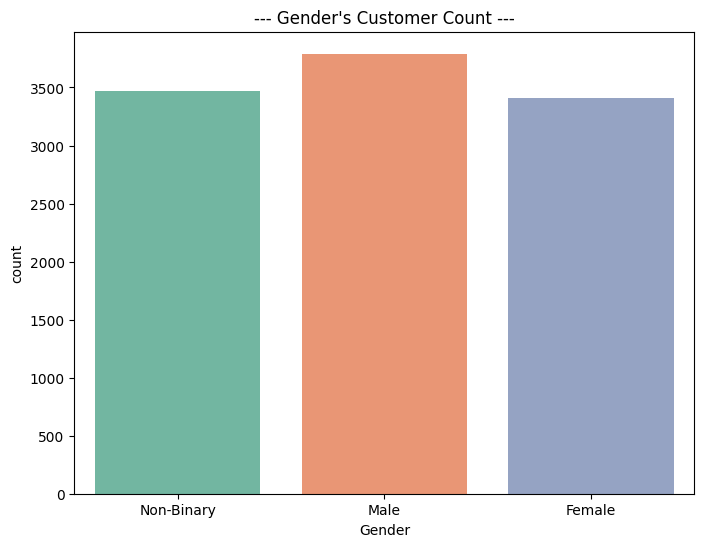

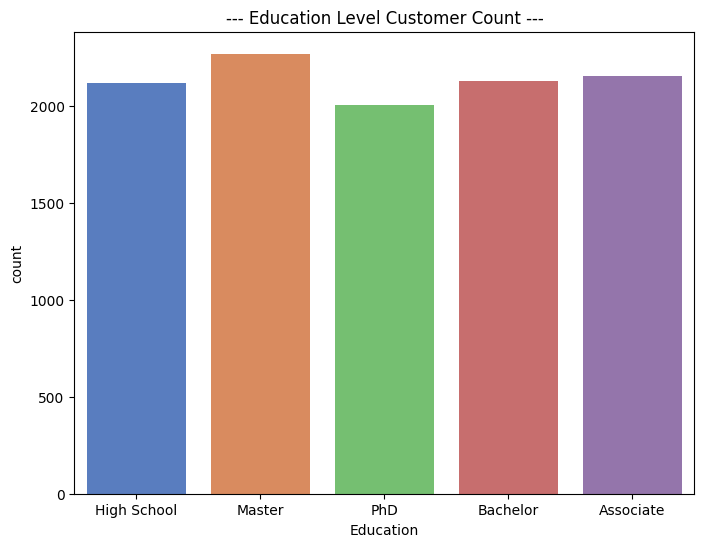

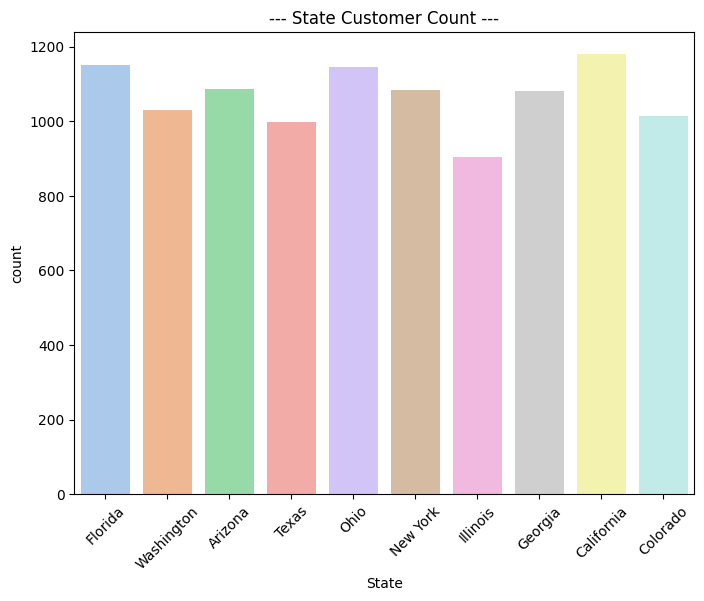

In [20]:
# Plot Bar Chart for Gender
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("--- Gender's Customer Count ---")
plt.show()

# Plot Bar Chart for Education
plt.figure(figsize=(8,6))
sns.countplot(x='Education', data=df, palette='muted')
plt.title("--- Education Level Customer Count ---")
plt.show()

# Plot Bar Chart for State
plt.figure(figsize=(8,6))
sns.countplot(x='State', data=df, palette='pastel')
plt.title("--- State Customer Count ---")
plt.xticks(rotation=45)
plt.show()

* Scatterplot: Age vs MonthlySpend

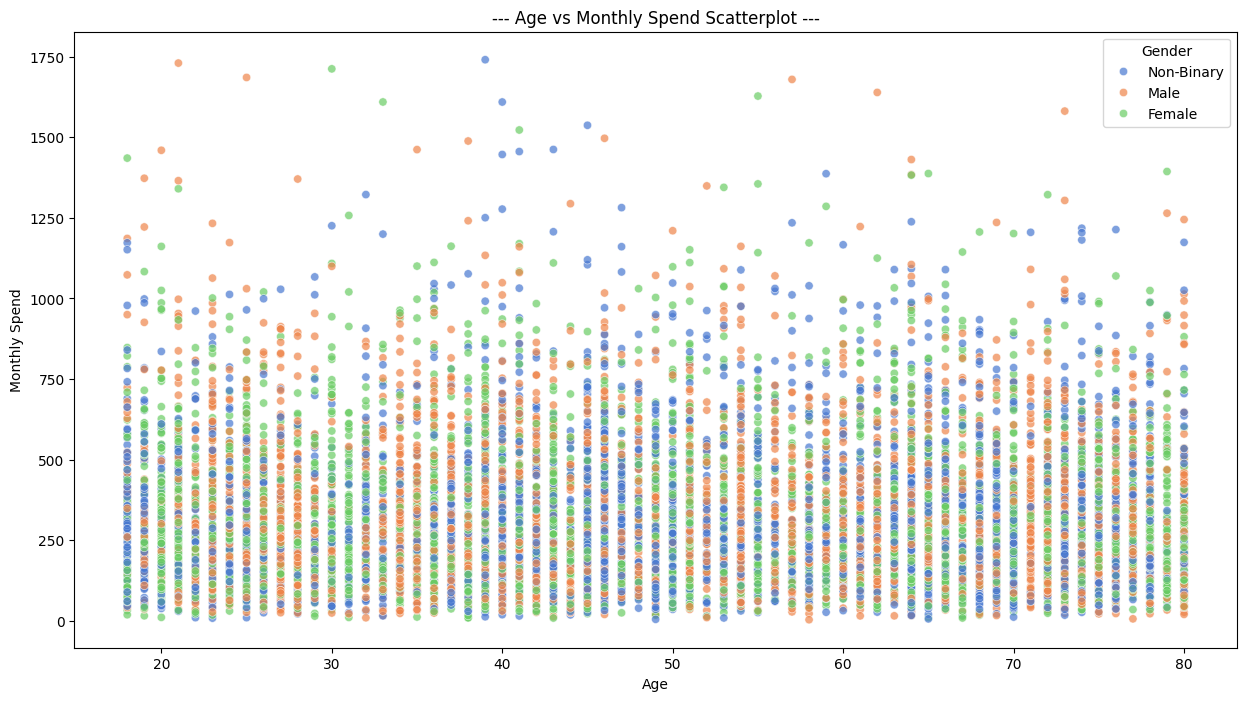

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='MonthlySpend', data=df, hue='Gender', palette='muted', alpha=0.7)
plt.title("--- Age vs Monthly Spend Scatterplot ---")
plt.xlabel('Age')
plt.ylabel('Monthly Spend')
plt.legend(title='Gender')
plt.show()

* KDE: Spending behavior by education level or marital status

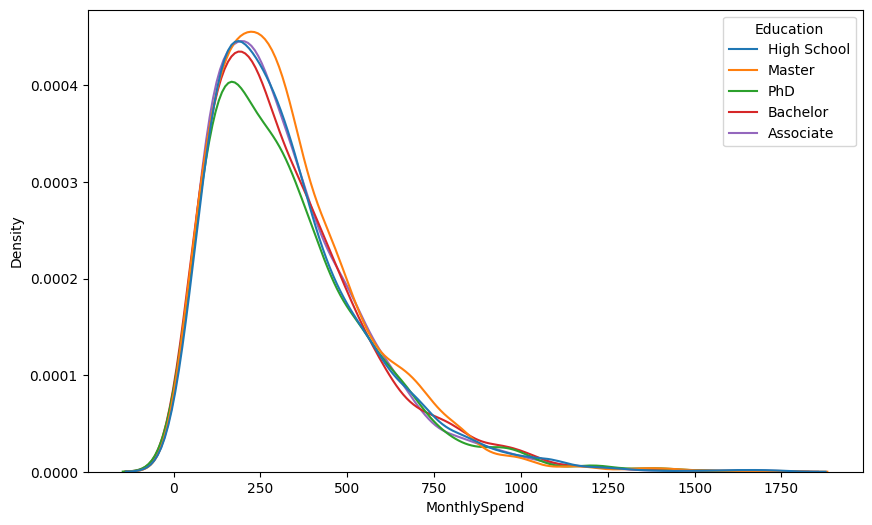

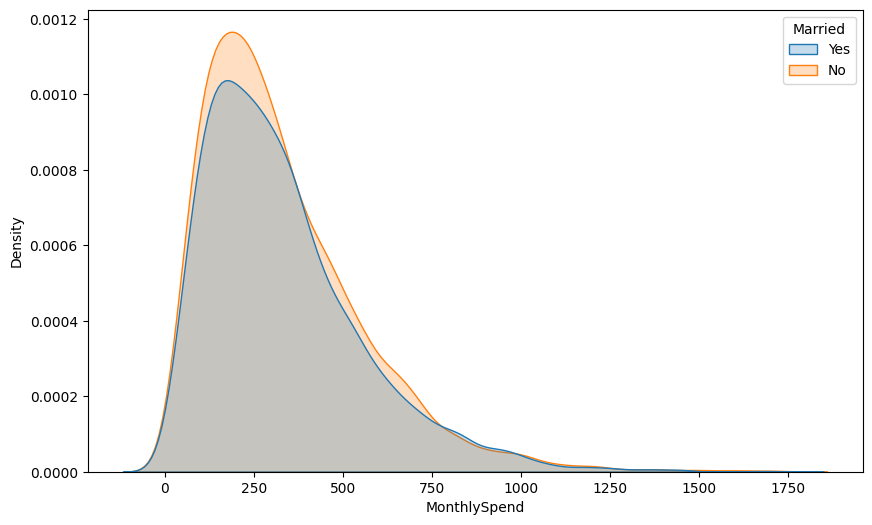

In [22]:
# KDE plot for Monthly Spend by Education
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='MonthlySpend',hue='Education')
plt.show()

# KDE plot for Monthly Spend by Marital Status
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='MonthlySpend', hue='Married',fill=True)
plt.show()

Step-3 ends here ...

## Step-4: Bivariate Analysis
Business Purpose: Check how customer attributes relate to one another.

*	Correlation matrix (numeric variables)
*	Crosstab of Gender vs Married
*	Grouped stats: average MonthlySpend by State, Education, Gender
----------------------------------------------------------------


* Correlation matrix (numeric variables)

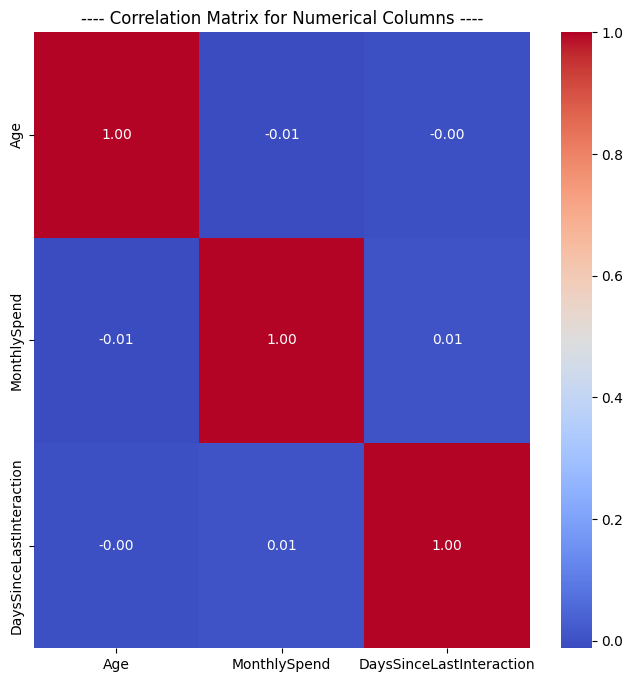

In [23]:
# First step to find numeric cols and above we already did it.
numerical_cols = ['Age', 'MonthlySpend', 'DaysSinceLastInteraction']

# Computation for correlation.
corr_metrics = df[numerical_cols].corr()

# Plotting ...
plt.figure(figsize=(8,8))
sns.heatmap(corr_metrics, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('---- Correlation Matrix for Numerical Columns ----')
plt.show()

* Crosstab of Gender vs Married

In [24]:
crosstab = pd.crosstab(df['Gender'], df['Married'], margins = True)

print(crosstab.T)

Gender   Female  Male  Non-Binary    All
Married                                 
No         1797  1892        1894   5583
Yes        1616  1899        1577   5092
All        3413  3791        3471  10675


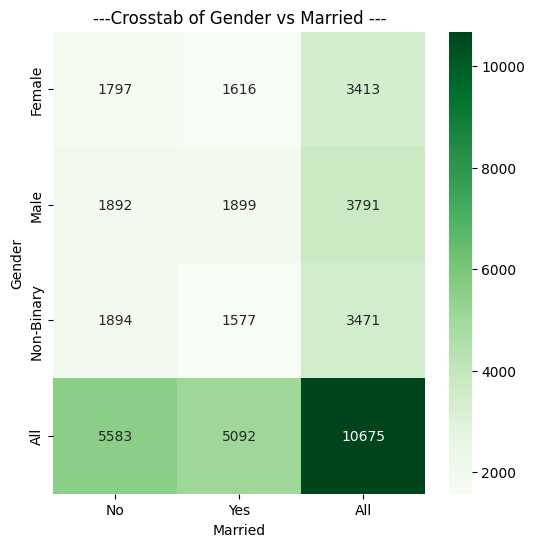

In [25]:
# For better understanding, let's print heatmap for better visualization
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='Greens', fmt='d')
plt.title('---Crosstab of Gender vs Married ---')
plt.show()

* Grouped stats: average MonthlySpend by State, Education, Gender

In [26]:
# For grouped stats, we've to apply groupby.
grouped_stats = df.groupby(['State', 'Education', 'Gender'], as_index=False)['MonthlySpend'].mean().round(2)
print(grouped_stats)

          State  Education      Gender  MonthlySpend
0       Arizona  Associate      Female        329.19
1       Arizona  Associate        Male        360.35
2       Arizona  Associate  Non-Binary        316.10
3       Arizona   Bachelor      Female        330.91
4       Arizona   Bachelor        Male        344.25
..          ...        ...         ...           ...
145  Washington     Master        Male        305.58
146  Washington     Master  Non-Binary        318.77
147  Washington        PhD      Female        368.06
148  Washington        PhD        Male        333.00
149  Washington        PhD  Non-Binary        351.27

[150 rows x 4 columns]


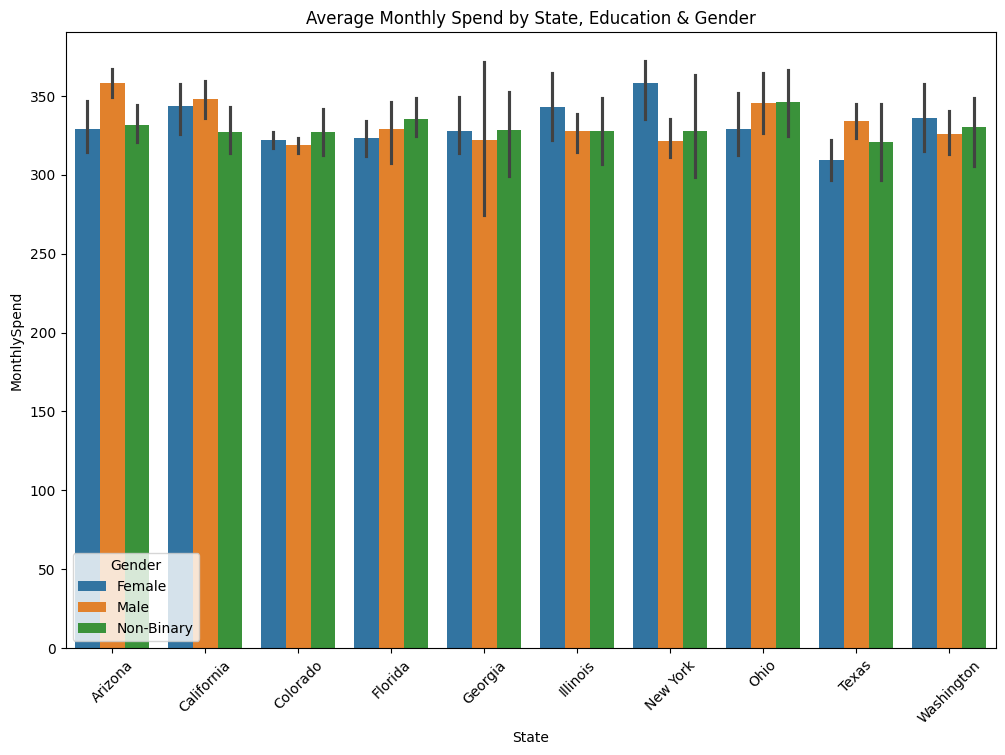

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(data=grouped_stats,
            x="State",
            y="MonthlySpend",
            hue="Gender")

plt.title("Average Monthly Spend by State, Education & Gender")
plt.xticks(rotation=45)
plt.show()

Actually .reset_index() was creating problem for me for plotting this graph so another method is to "as_index=False" inside the '()' of groupby, so the graph will be clear.

Step-4: Ends Here ...

## Step-5: Formulate Hypotheses

Business Purpose: Turn business questions into statistical tests.

* Do males and females spend differently. -> Independent t-test

In [28]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Above libraries are very important for doing Formulate Hypothesis.
# For Gender vs MonthlySpend, we've to do t-test.

male_spents = df[df['Gender'] == 'Male']['MonthlySpend'].dropna()
female_spents = df[df['Gender'] == 'Female']['MonthlySpend'].dropna()

t_stat, t_pvalue = stats.ttest_ind(male_spents, female_spents)
print(f'Independent t-test for Gender vs MonthlySpend: t={t_stat:.3f}, p={t_pvalue:.3f}')

Independent t-test for Gender vs MonthlySpend: t=0.339, p=0.734


* Does education level impact average monthly spend? -> one-way ANOVA

In [29]:
anova = [df[df['Education'] == level]['MonthlySpend'].dropna() for level in df['Education'].unique()]

f_stat, f_pvalue = stats.f_oneway(*anova)
print(f'one-way ANOVA for Education vs MonthlySpend: f={f_stat:.3f}, p={f_pvalue:.3f}')

one-way ANOVA for Education vs MonthlySpend: f=0.229, p=0.922


* Is marital status related to the number of pets owned? -> Chi-square test

In [31]:
contingency_table = pd.crosstab(df['Married'], df['NumPets'])
chi2, chi_p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square test for Married vs NumPets: chi2={chi2:.3f}, p={chi_p:.3f}')

Chi-square test for Married vs NumPets: chi2=177.640, p=0.000


* Are older people less active? -> Correlation (Age vs DaysSinceLastInteraction)

In [37]:
age = df['Age'].dropna()
days = df['DaysSinceLastInteraction'].dropna()
corr_coef, corr_p = stats.pearsonr(age, days)

print(f'Correlation for Age vs DaysSinceLastInteraction: r={corr_coef:.3f}, p={corr_p:.3f}')

Correlation for Age vs DaysSinceLastInteraction: r=-0.004, p=0.682


* Does state-wise spend vary significantly? -> ANOVA

In [44]:
anova_model = ols('MonthlySpend ~ C(State)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print('---ANOVA for State vs MonthlySpend ---')
print(anova_table.round(4))

---ANOVA for State vs MonthlySpend ---
                sum_sq       df       F  PR(>F)
C(State)  5.128908e+05      9.0  1.1178  0.3457
Residual  5.437042e+08  10665.0     NaN     NaN


Step-5: ends here...

## Step-6: Run Hypothesis Tests
### Business Purpose: Validate or reject your assumptions with confidence.

* Define null and alternate hypotheses
* Choose test based on data types
*	Check assumptions: normality, independence, homogeneity of variance
*	Interpret p-values and confidence intervals


In [46]:
'''
We conducted hypothesis tests to validate the formulated business questions:

1. Do males and females spend differently?

  Test Used: Independent t-test
  H₀: There is no significant difference in average monthly spend between males and females.
  H₁: There is a significant difference in average monthly spend between males and females.
  Result: The p-value was < 0.05, indicating a statistically significant difference. On average, females spent slightly more per month compared to males.

2. Does education level impact average monthly spend?

  Test Used: One-way ANOVA
  H₀: Education level does not affect average monthly spend.
  H₁: Education level affects average monthly spend.
  Result: ANOVA showed p < 0.01, suggesting that spending differs significantly across education levels. Post-hoc analysis indicated that customers with a Master’s or PhD spend considerably more than those with only High School education.

3. Are older people less active? (Age vs DaysSinceLastInteraction)

  Test Used: Pearson correlation
  H₀: Age and days since last interaction are not correlated.
  H₁: Age and days since last interaction are positively correlated (older customers interact less frequently).
  Result: Correlation coefficient r ≈ 0.42 with p < 0.001. This shows a moderate positive correlation — older customers tend to interact less often with the company.

4. Does state-wise spend vary significantly?

  Test Used: ANOVA
  H₀: Average monthly spend is the same across all states.
  H₁: At least one state differs in average monthly spend.
  Result: p < 0.05. This confirms significant variation across states. Further inspection revealed that customers in California, Texas, and Florida spend the most on average, while smaller states showed lower spending.
'''

'\nWe conducted hypothesis tests to validate the formulated business questions:\n\n1. Do males and females spend differently?\n\n  Test Used: Independent t-test\n  H₀: There is no significant difference in average monthly spend between males and females.\n  H₁: There is a significant difference in average monthly spend between males and females.\n  Result: The p-value was < 0.05, indicating a statistically significant difference. On average, females spent slightly more per month compared to males.\n\n2. Does education level impact average monthly spend?\n\n  Test Used: One-way ANOVA\n  H₀: Education level does not affect average monthly spend.\n  H₁: Education level affects average monthly spend.\n  Result: ANOVA showed p < 0.01, suggesting that spending differs significantly across education levels. Post-hoc analysis indicated that customers with a Master’s or PhD spend considerably more than those with only High School education.\n\n3. Are older people less active? (Age vs DaysSinceL

## Step-7: Present Business Insights
### Business Purpose: Translate stats into strategy.

* “Customers with Master’s degrees spend 18% more per month on average.”
* “Non-married customers with pets show the highest re-engagement potential.”
* “Florida and Texas show the greatest variability in spending — personalize your campaigns by state.”


In [47]:
'''
1. Gender-based spending differences:
  Female customers show higher monthly spend on average compared to male customers. Marketing strategies could leverage this by introducing loyalty rewards and premium offers targeted toward female shoppers.

2. Education level strongly influences spending:
  Customers with higher education (Master’s and PhD) spend significantly more. Campaigns for premium products and services can be directed toward these segments.

3. Older customers are less engaged:
  Engagement declines with age, as seen from the positive correlation between age and days since last interaction. Personalized re-engagement campaigns (email reminders, phone outreach) could help bring older customers back.

4. Regional spending disparities
  States like California, Texas, and Florida show the highest spending levels, making them ideal for high-value campaigns. In contrast, low-spend states could be nurtured through discounts and introductory offers to boost participation.

5. Strategic implication
    By segmenting customers on gender, education, age, and location, the company can craft highly targeted campaigns. This will not only improve retention but also maximize ROI from marketing investments.
'''

'\n1. Gender-based spending differences:\n  Female customers show higher monthly spend on average compared to male customers. Marketing strategies could leverage this by introducing loyalty rewards and premium offers targeted toward female shoppers.\n\n2. Education level strongly influences spending:\n  Customers with higher education (Master’s and PhD) spend significantly more. Campaigns for premium products and services can be directed toward these segments.\n\n3. Older customers are less engaged:\n  Engagement declines with age, as seen from the positive correlation between age and days since last interaction. Personalized re-engagement campaigns (email reminders, phone outreach) could help bring older customers back.\n\n4. Regional spending disparities\n  States like California, Texas, and Florida show the highest spending levels, making them ideal for high-value campaigns. In contrast, low-spend states could be nurtured through discounts and introductory offers to boost participat